# COGS 118A - Final Project

# Insert title here

## Group members

- Lingxi Li
- Jianghua Lu
- Yvonne Luo
- Man Kui Sit
- Robert Zhang

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents 
- the solution/what you did
- major results you came up with (mention how results are measured) 

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

# Background

The current global pandemic has changed so many aspects of people’s lives. From global circuit chip shortages to lack of daily life products, everything is making it harder for people to get back to their old, carefree lives. Other than the obvious threat of COVID virus, one impact the pandemic is throwing at our shoulder is that living costs are continuously rising. One particular example is house pricing. A combination of stimulus, low mortgage rate, and simple high demand for housing due to the nature of work-from-home are all tempting people to buy new houses<a name="house price reason"></a>[<sup>[1]</sup>](#reason). As house pricing keeps skyrocketing and driving daily living expenses to the roof, predicting house prices is becoming a very relevant problem. What factors are contributing to a huge house check, how are different factors weighted, and given various feature variables, is there a consistent and accurate method for predicting house prices? These are the questions being magnified under the current special time, and we look to address them with a machine learning approach. 
<br>
The idea of this project stems from an on-going Kaggle challenge<a name="house price pred"></a>[<sup>[2]</sup>](#pred) with over 4000 participants. This competition originated back in 2016, but the data is still extremely valuable because the feature set is extensive and contains every possible description of a house. Similar work in the related area from Varma et al. also addresses the problem of predicting house prices using regression techniques<a name="other paper"></a>[<sup>[3]</sup>](#paper). Our work aims at developing an effective regression model by comparing various different popular ones and tries to yield the most effective one.

# Problem Statement

The problem we are trying to solve is predicting housing price based on its condition and features(specific feature selection to be determined). Some examples of features include: Neighborhood(Physical locations within Ames city limits), LotArea(Lot size in square feet), Utilities(Type of utilities available), YearBuilt(Original construction date), etc. More detailed descriptions and definitions of features will be included in the data section. This problem is quantifiable because all measurements are either originally numerical or can be encoded numerically using strategies such as one-hot encoding; the problem is measurable because the final predicted result price can be directly compared to the actual price using the difference between the predicted and actual price, R^2, and Root Mean Square Error as the metrics; the problem is replicable because all the machine learning models can be selected, trained, and tested based on the data we found repeatedly in order to verify the result.

# Data

The dataset originates from an open source machine learning competition from Kaggle. In total it contains roughly 3000 data samples containing house sales in the past 20 years. The dataset contains extremely comprehensive all-around descriptions of every aspect of a house, some of which are even a bit repetitive. The information ranges from house overall dwelling type, house built material, and house condition, to minute details and walkway pavement material, basement height, or number of fireplaces. For the sake of our prediction, such exhaustive information is both conducive for the task, since the more informative details we have, the better our model is supposed to generalize. On the other hand, too many repetitive features might only add up to the training complexity, and even render our model hard to apply in a real world setting as it might be hard to gather all such information about a house. Thus, some extent of data selection and preprocessing is needed. Some repetitive features, such as road access and alley access type, can be combined into one. Some features like exterior finish material are broken up into two separate columns, one for only one material and another for multiple materials used. Such can also be combined into one. Some features, such as basement area, basement height, basement material, basement conditions, etc. are all descriptions of the basement and might be too detailed for the task. So we will use some data selection and preprocessing to trim them down into lower dimensionality.

Here we give some basic visualization of the raw data and postpone the actual data cleaning to later sections. The data can be divided into two major categories, numerical and categorical. Since the two types of data are inherently different in terms of preprocessing techinques, we generate different visualizations for them. 

First in figure below, we visualize the distribution of our final target, the house prices. We can observe that most house prices lie in the range around 200k USD. The overall distribution is also a descently shaped Gaussian. 
![House price distribution](./graphs/price_dist.png)

Below is the overall distribution visualization for each one of the numerical features in our dataset. This is a general visualization of all features. We can directly observe that some features, such as low quality finish, is predominated by one features. Features like this will contribution minimally to our final prediction and are candidates for removal. 
![numerical dist](./graphs/num_hist.png)

Another important aspect of the data is correlation. Since in the end we want to devise a regression model with respect to house price, correlation with house prices is of great importance. Below is a correlation heatmap with respect to all numerical features in place. Just by directly observing the correlations, some features already stand out in importance such as years built and number of rooms (in light color). Those darker features can be considered for removal later on. 
![correlation](./graphs/corr.png)

With respect to categorical features, we present a graph showing all the histograms as well. Similar to what we conclude with numerical features, those features that are predominatantly lying in one category are likely to make very minimal contribution to our regression task, hence considered for removal later on. 
![cat hist](./graphs/cat_hist.png)

**All related code for visualization is provided in data_processing_v2.ipynb notebook for space saving reasons**

# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

# Evaluation Metrics

Since we are predicting future housing prices based on current data, we  implement a regression model. R^2, coefficient of determination, is a popular evaluation metric for goodness of fit when it comes to regression tasks. It is “the proportion of the variance in the dependent variable that is predictable from the independent variable”<a name="wiki"></a>[<sup>[4]</sup>](#wikinote). The value of R^2 ranges from 0 to 1 (R^2 of a model could be less than zero/negative, which is worse than R^2=0 that’s always predicting the mean value of y), and a R^2 value of 1 is the best scenario when the model gives perfect predictions. In the context of our project, we interpret R^2 as the proportion of the variance in the target variable (selling prices) that can be explained by the features (utilities, house style, year built, etc.). 

$$
R^2 = 1 - \frac{\sum(y_i-\hat{y}_i)^2}{\sum(y_i-\overline{y}_i)}
$$

Another metric we are using is Root Mean Squared Error (RMSE), the standard deviation of the residuals. In the context of our project, we take the square root of the average of squared differences between predicted price and actual price. Since RMSE penalizes large errors, it’s very sensitive to outliers.

$$
RMSE = \sqrt{\frac{1}{n}\sum{(y_j-\hat{y}_j)^2}}
$$

Both metrics will provide crucial information regarding whether the model fits our data, while R^2 is scaled in percentage term, RMSE is in abosolute term so the value of RMSE will probably look large since we have big numbers.

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.



### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

Since our problem is a price prediction task, regression models are most appropriate. What we will do is develop a model that predicts housing sale prices based on different features of the houses.

We have chosen several different models and plan on comparing their performance to get the best model:
1. Logistic Regression
2. Neural Network

### Subsection 2

Based on the observations we made in our data introduction section, some extensive data cleaning and selections are performed. Our selection is mainly from statisical perspective. The first cleaning procedure is a variance threshold. As mentioned above, features with really low variance or those that lie predominantly in one feature category is unlikely to be of any use to our regression since they cannot be used to differentiate two data points. We choose a variance threshold of 0.1 meaning that we will be dropping the 10% of features in variance ranking. 'BsmtHalfBath', 'KitchenAbvGr' are the features dropped here. The next selection criterion is similar to variance. Correlation is a similar statistic attribute. We choose to drop the last 20% in terms of correlation. 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BedroomAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold' are the features dropped. After we are done with such feature selection, a visualization with respect to sale price, our final prediction target, is given below. 
![cat hist](./graphs/num_regression.png)


A similar data cleaning procedure is done for categorical features. For those features 90% of which lie in one category are removed from prediction. 'Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature' are the set of features removed. 

'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition'
       
are the remaining features that we will use for final task. For categorical features, we will transform them into numerical ones by using onehot encoding. 

**All related code for data cleaning is provided in data_processing_v2.ipynb notebook for space saving reasons**

The final cleaned dataset:

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('data/cleaned_data.csv').iloc[:, 1:]
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']
data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,7.0,2003.0,2003.0,196.0,706.0,150.0,856.0,856.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,80.0,9600.0,6.0,1976.0,1976.0,0.0,978.0,284.0,1262.0,1262.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,68.0,11250.0,7.0,2001.0,2002.0,162.0,486.0,434.0,920.0,920.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.0,9550.0,7.0,1915.0,1970.0,0.0,216.0,540.0,756.0,961.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,84.0,14260.0,8.0,2000.0,2000.0,350.0,655.0,490.0,1145.0,1145.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917.0,6.0,1999.0,2000.0,0.0,0.0,953.0,953.0,953.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,85.0,13175.0,6.0,1978.0,1988.0,119.0,790.0,589.0,1542.0,2073.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,66.0,9042.0,7.0,1941.0,2006.0,0.0,275.0,877.0,1152.0,1188.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,68.0,9717.0,5.0,1950.0,1996.0,0.0,49.0,0.0,1078.0,1078.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

Our chosen base model is a logistic regression. Since our dataset contains few observations for a machine learning task, we decided to use k-folds to improve the performance of our model.

c:\Users\Yvonne Luo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Yvonne Luo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

([0.5232468808658478,
  0.27161632570314986,
  0.4909515443345809,
  0.43594161406686527,
  0.33525288474106685],
 [51358.52919931726,
  69180.6952829734,
  62108.504843545255,
  53455.00853864339,
  66763.57574511698])

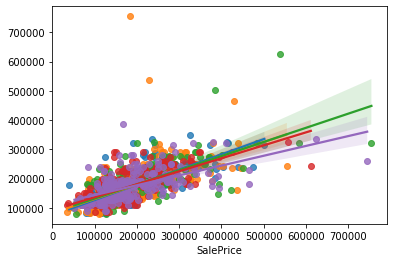

In [2]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
kf = KFold(n_splits=5)
r2_results = []
rmse_results = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    sns.regplot(x=y_test, y=y_pred)
    rsquared_score = r2_score(y_test, y_pred)
    rmse_score = mean_squared_error(y_test, y_pred) ** (1/2)
    r2_results.append(rsquared_score)
    rmse_results.append(rmse_score)
r2_results, rmse_results

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

We also trained a random forest regressor. Random forest is well known for its strong performance and robustness in terms of generalization. Since our dataset is very limited, we make use of extensive cross validation, repeated kfolds, and grid search for hyperparameters tuning. We choose a kfold and repeated kfold number to be 5 and 5. For parameter searching, the choices are from n_estimators, whose range is from 100, 300, 500; max_depth, whose range is from 10, 30, 50; min_samples_split, the range of which is 2, 5, 10; and  min_samples_leaf from 1, 2, 4. The set of parameters is chosen with some heuristics and some basic model training. 

The best performing model in a Root Mean Squared Error sense is max_depth: 50, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 100, with a final performance of 28591.84. 

We also show some visualization with respect to each parameter. Below is a plot over all four parameters we searched on. And each plot is a score vs parameters. From the plot, we can see that n_estimators has a positive correlation with score, whereas max depth caps out at around 30. min_samples split and min samples leaf, on the other hand, have a negative correlation. Adding them all explains the best parameters we have obtained in the end. 
![rf params](./graphs/rf_parms.png)

**Detail code can be found in data_processing_v2**

# Prediction based on Neural Network (Keras)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

In [ ]:
# 36 features
model = Sequential()
model.add(Dense(36,activation='relu', input_dim=36))
model.add(Dense(18,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='linear'))

model.summary()

In [ ]:
# define metrics
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

def r2_score(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

model.compile(loss='mean_squared_error' , optimizer='adam', metrics=[rmse, r2_score])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
history = model.fit(X_train.values, y_train.values, epochs=200, batch_size=128, validation_split=0.2)

In [ ]:
y_pred = model.predict(X_test.values)

In [ ]:
# display loss
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# display R^2
plt.plot(history.history['r2_score'], label='MSE (training data)')
plt.plot(history.history['val_r2_score'], label='MSE (validation data)')
plt.title('R^2')
plt.ylabel('R^2 score')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# display RMSE
plt.plot(history.history['rmse'], label='MSE (training data)')
plt.plot(history.history['val_rmse'], label='MSE (validation data)')
plt.title('RMSE')
plt.ylabel('RMSE')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(y_test.values.reshape(-1,1), y_pred)  
y_fit = regressor.predict(y_pred) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

plt.scatter(y_test, y_pred, color='blue', label= 'data')
plt.plot(y_pred, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()

In [ ]:
import sklearn.metrics, math
print("R^2 score (R^2):                 %f" % sklearn.metrics.r2_score(y_test,y_pred))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test,y_pred)))

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

Our dataset is pretty small to be used as a machine learning dataset. Having more data is likely to yield a more reliable prediction. The dataset also contains numerous features of houses, which led to a potentially too complicated model.

### Ethics & Privacy

Our research question and hypothesis are designed to explore the house pricing dataset and train a model to make good predictions based on some features. The dataset we use is a public, open-source dataset on Kaggle, which gives us the right to perform data analysis and modeling on it. The dataset is anonymized so we will not violate any personal rights regarding the properties. 

We have monitored the biases in the dataset during our project. The dataset is collected by Kaggle is might be biased and thus not representative due to various factors, for instance, missing values. We address this problem during our data cleaning process, remove a few features due to overlap during feature selection, and carry out feature encoding to enable statistical analysis. We have ensured our visualizations, summary statistics, and reports are honestly representing the underlying data.

We have monitored the biases during our data analysis and modeling. The bias in the model might lead to biased results, and we have ensured the variables in the model are not unfair or discriminatory in any way. We have explained the decisions made based our models in an understandable way. 

Our project repository is open to the COGS 118A staff members for any investigation and has undergone peer review processes during the project.

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="house price reason"></a>1.[^](#reason): Why House prices surged as the COVID-19 pandemic took hold. Dallasfed.org. (n.d.). Retrieved April 24, 2022, from https://www.dallasfed.org/research/economics/2021/1228.aspx  <br> 

<a name="house pred"></a>2.[^](#pred): House prices - advanced regression techniques. Kaggle. (n.d.). Retrieved April 24, 2022, from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/description  <br> 

<a name="other paper"></a>3.[^](#paper): A. Varma, A. Sarma, S. Doshi and R. Nair, "House Price Prediction Using Machine Learning and Neural Networks," 2018 Second International Conference on Inventive Communication and Computational Technologies (ICICCT), 2018, pp. 1936-1939, doi: 10.1109/ICICCT.2018.8473231.  <br> 

<a name="wikiznote"></a>4.[^](#wiki):Wikimedia Foundation. (28 May 2022). Coefficient of determination. *Wikipedia.*
https://en.wikipedia.org/wiki/Coefficient_of_determination<br> 